#  Bài tâp về mạng tích chập

Trong bài này, chúng ta sẽ xây dựng một mạng tích chập sử dụng Torch và thử train&Test tập MNIST nhé. 


## Tổng quan một mạng CNN cơ bản

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST dataset

Trong bài tập này, chúng ta sẽ sử dựng tập MNIST rất nổi tiếng vể  các chữ số viết tay từ 0->9. Tập dataset này bao gồm 60000 ảnh cho training và 10000 ảnh cho testing. Các bức ảnh này đều đã được căn giữa và chỉnh với kích thước cố định là 28x28.

Trong phần tiền xử lý, chúng ta sẽ cần chuẩn hóa các giá trị pixel của mỗi ảnh về khoảng [0,1], kiểu dữ liệu sẽ là float32

<!-- ![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png) -->

Chi tiết tại: http://yann.lecun.com/exdb/mnist/

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import random

# Some configs

In [ ]:
# Số classes trong tập MNIST
num_classes = None

# Số epoch 
epochs = None

# Các tham số cần thiết cho quá trình traning.
learning_rate = None
batch_size = None
display_step = None

# Tham số mạng CNN 
out_channel_1  = None # số channel của đầu ra conv thứ 1
out_channel_2 = None # số channel của đầu ra conv thứ 2

# Path lưu best model 
checkpoint = None # có thể để dạng *.pth

# Dataloader

In [ ]:
# Transform image 
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) 
    ])

# load dataset từ torchvision.datasets
train_dataset = datasets.MNIST('../data', train=True, download=True,transform=None)
test_dataset = datasets.MNIST('../data', train=False,transform=None)
train_loader = torch.utils.data.DataLoader(None,batch_size=None)
test_loader = torch.utils.data.DataLoader(None,batch_size=None)

# Model

- Input shape sẽ là: [-1, 28, 28, 1]. Ở đây -1 sẽ thể hiện batchsize, một batch thì gồm nhiều ảnh 28x28x1 (grayscale, số channel là 1 !)
- Chúng ta sẽ định nghĩa một model đơn giản gồm 2 lớp Conv đều có filter size là 3x3 và stride hãy set là 1. 
- Ngoài ra sẽ có một lớp maxpool, set filter size 2x2
- Flow như sau: conv2d_1 -> relu -> conv2d_2 -> relu -> maxpool2d -> dropout -> flatten -> linear1 -> relu -> dropout -> linear2


In [ ]:
# Định nghĩa model 

model = nn.Sequential (
    nn.Conv2d(None, None, None, None),
    nn.ReLU(),
    nn.Conv2d(None, None, None, None),
    nn.ReLU(),
    nn.MaxPool2d(None),
    nn.Dropout(None),
    nn.Flatten(),
    nn.Linear(None, None),
    nn.ReLU(),
    nn.Dropout(None),
    nn.Linear(None, None)       
)

# load lại pretrained model (nếu có)
try:
  None 
except:
  print("!!! Hãy train để có checkpoint file")

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=None)
best_val_loss = 999

for epoch in range(1,None):
    # Quá trình training 
    model.train()
    for batch_idx, (data, target) in enumerate(None):
        optimizer.zero_grad()
        output = None
        loss = None
        loss.backward()
        optimizer.step()
        if batch_idx % display_step == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    # Quá trình testing 
    model.eval()
    test_loss = 0
    correct = 0
    # set no grad cho quá trình testing
    with torch.no_grad():
        for data, target in None:
            output = None
            output = None # log softmax using F
            test_loss += None 
            pred = None # argmax để lấy predicted label, chú ý keepdim = True
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(None) 
    if test_loss < best_val_loss:
      best_val_loss = test_loss
      None # Lưu lại model
      print("***********    TEST_ACC = {}%    ***********".format(correct))

# Visualize Image

In [ ]:
# load lại model đã train
None
# set eval phase 
None

In [ ]:
item = iter(test_loader)

In [ ]:
data,target = item.next() # lấy một batch ra

In [ ]:
test_idx = random.choice(range(len(data))) # lấy index của một phần tử của một batch

In [ ]:
data = data[test_idx]
target = target[test_idx]
assert data.shape == (1,28,28)

In [ ]:
# thử predict 

def plot(data,model):
  data = None # unsqueeze data
  output = None
  output = None # log softmax, chú ý dim
  pred = None # argmax, chú ý keepdim 
  print("Predict Number : ", pred[0][0].numpy()) 
  plt.imshow(data[0][0],cmap='gray')
  plt.show()

Predict Number :  5


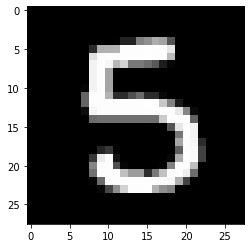

In [ ]:
plot(data,model)